In [49]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, IntSlider, FloatSlider
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn import linear_model
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier 
%matplotlib inline

### Setting Up the Environment for Data Analysis, Visualization, and Machine Learning

#### Libraries and Modules Used:

- **Data Analysis and Wrangling**:
  - **`numpy`**: Provides support for efficient numerical computation, essential for handling large data arrays and matrices.
  - **`pandas`**: Offers data structures and operations for manipulating numerical tables and time series. It is fundamental for data cleaning, preparation, and analysis tasks.
  - **`random`**: Used for generating random numbers, often useful for tasks such as data sampling or splitting datasets into training and testing sets.

- **Visualization Tools**:
  - **`seaborn`**: A Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.
  - **`matplotlib.pyplot`**: A collection of functions that make matplotlib work like MATLAB. It is used to create figures and plots for data visualization.
  - **`%matplotlib inline`**: A magic function in Jupyter Notebook that renders figures directly below the code cell that produced them. The figures are stored in the notebook document.

- **Machine Learning Algorithms**:
  - **`LogisticRegression`**: A statistical model that in its basic form uses a logistic function to model a binary dependent variable. In the context of machine learning, it is used for binary classification tasks.
  - **`SVC`**: Variants of SVM (Support Vector Machine) used for different types of classification tasks. While `SVC` is used for classifying with kernels.
  - **`RandomForestClassifier`**: An ensemble learning method for classification that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees.
  - **`DecisionTree`**:It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
  - **`XGB Classifier`**:XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library.
  - **`Gradient Boost Classifier`**: GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function.
  - **`Neural Network`**:Neural networks are composed of interconnected nodes or "neurons," organized into layers that process input data to yield decisions or predictions.

In [50]:
#Loading dataset of Throid Cancer
tc = pd.read_csv('Thyroid_Diff.csv')
tc.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [51]:
# Display information about the dataset
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [52]:
# Display a statistical summary of numeric columns
display(tc.describe())

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [53]:
# Display a summary of categorical data
display(tc.describe(include=['O']))

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


# Data Cleaning

In [54]:
# Check for missing values in the dataset
missing_values = tc.isnull().sum()
missing_values

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

There are no missing values in the given dataset. 

In [55]:
#Displaying Columns of the dataset
tc.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [56]:
print(tc['T'].value_counts())

T
T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: count, dtype: int64


Displaying types of tumer with their count present. 

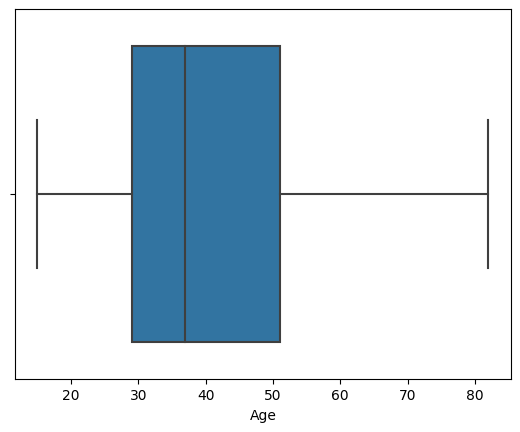

In [57]:
#boxplot to display outliers
ax=sns.boxplot(x='Age', data = tc)
plt.show()

There are no outliers in numerical values in the dataset.

# Exploratory Data Analysis (EDA)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


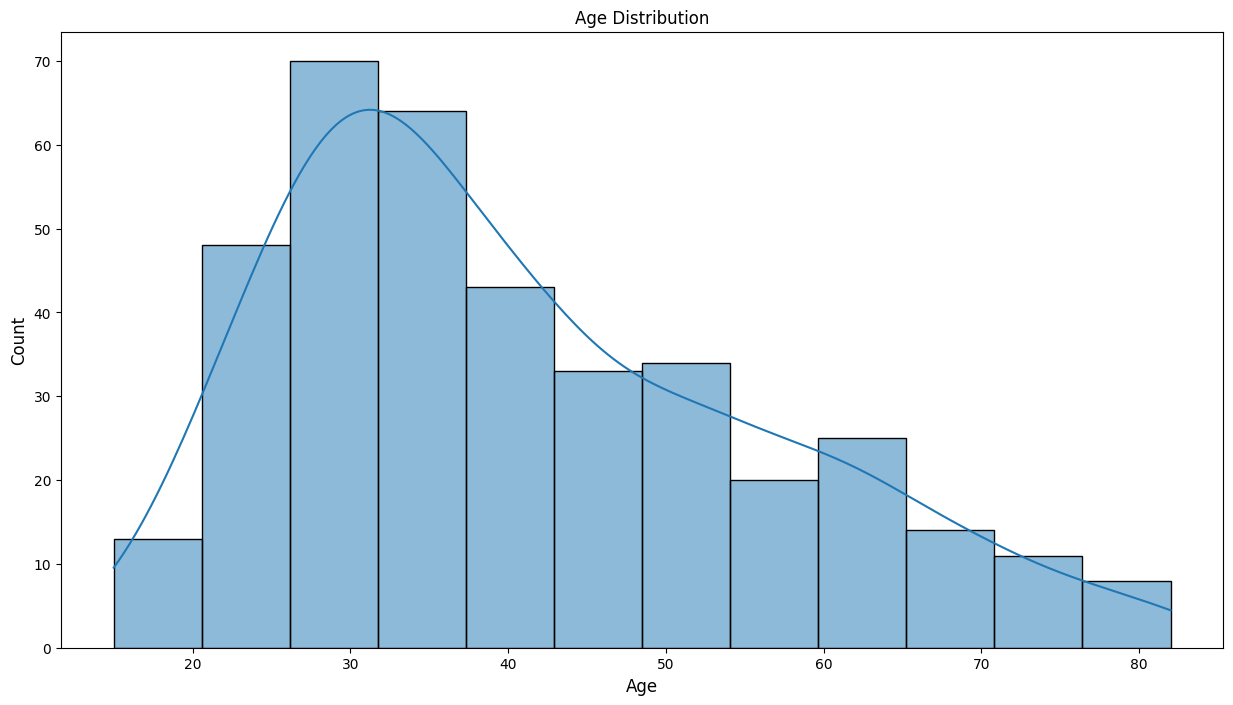

In [58]:
# Plot the distribution of Age
plt.figure(figsize=(15, 8))
sns.histplot(tc["Age"], kde=True)
plt.title("Age Distribution", fontsize =12)
plt.xlabel("Age",fontsize =12)
plt.ylabel("Count", fontsize =12)
plt.show()

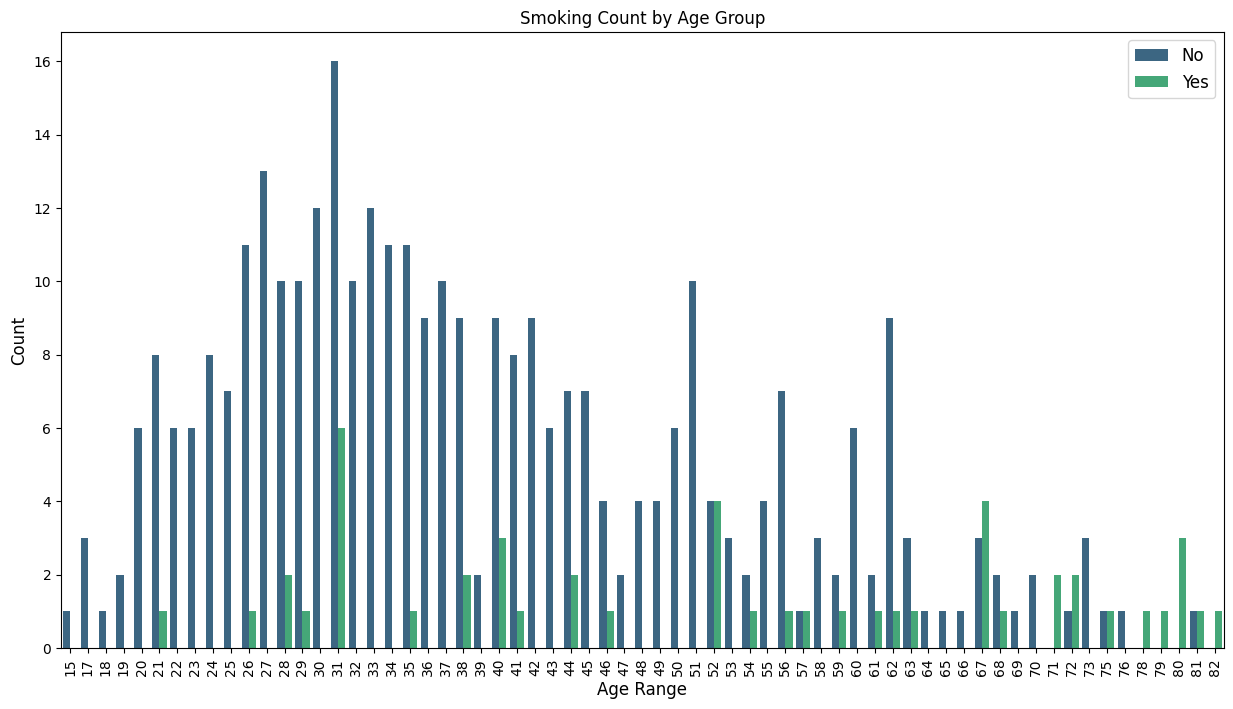

In [59]:
#Display countplot of smoking count by Age group
plt.figure(figsize=(15, 8))
sns.countplot(x='Age', hue='Smoking', data=tc, palette='viridis')
plt.title('Smoking Count by Age Group', fontsize =12)
plt.xlabel('Age Range', fontsize =12)
plt.ylabel('Count', fontsize =12)
plt.legend(title='Cancer')
plt.grid(False)
plt.legend(fontsize =12)
plt.xticks(rotation =90)
plt.show()

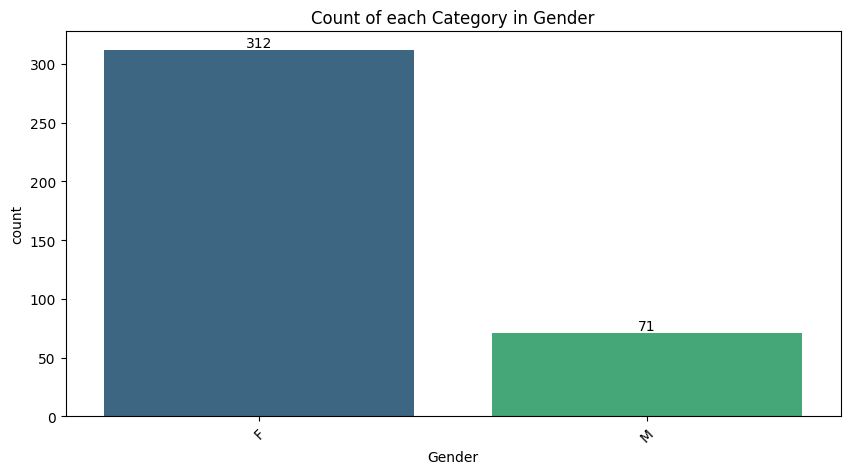

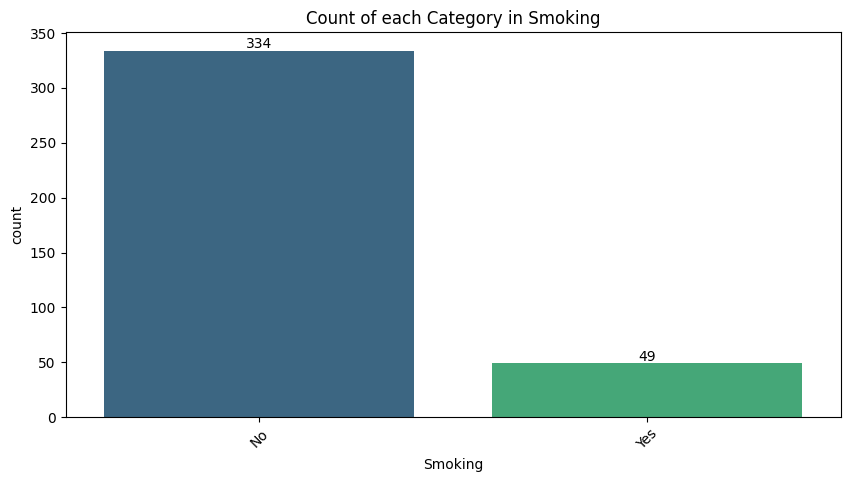

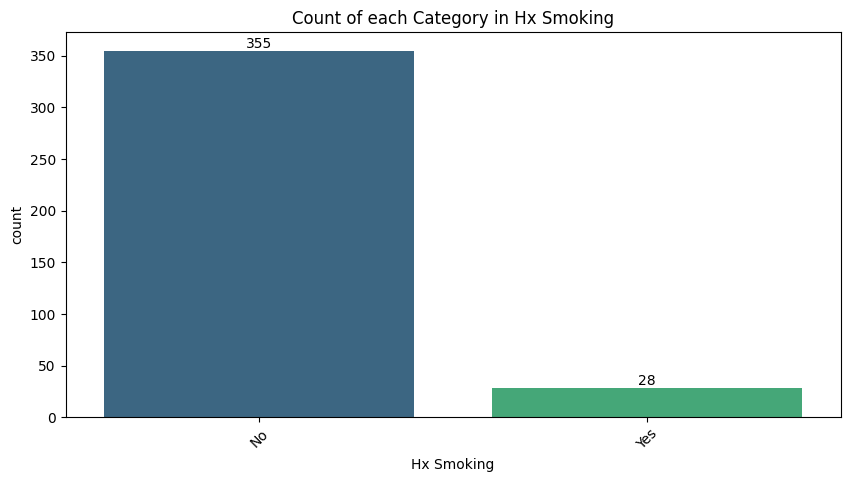

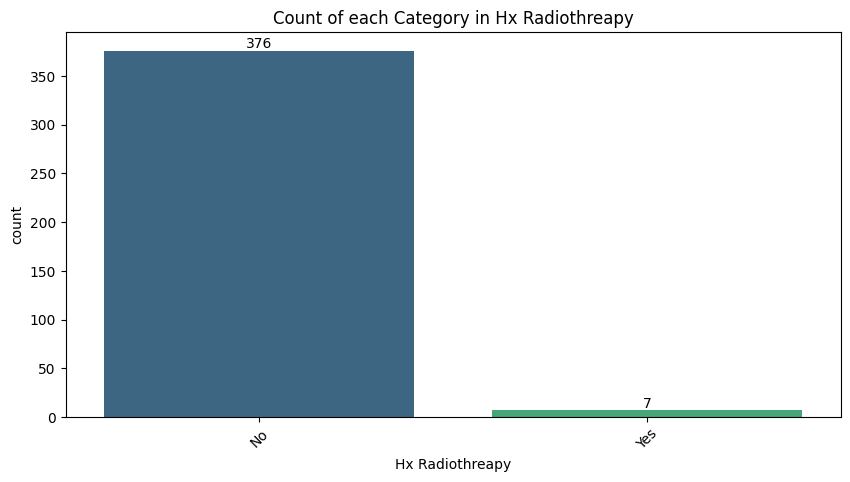

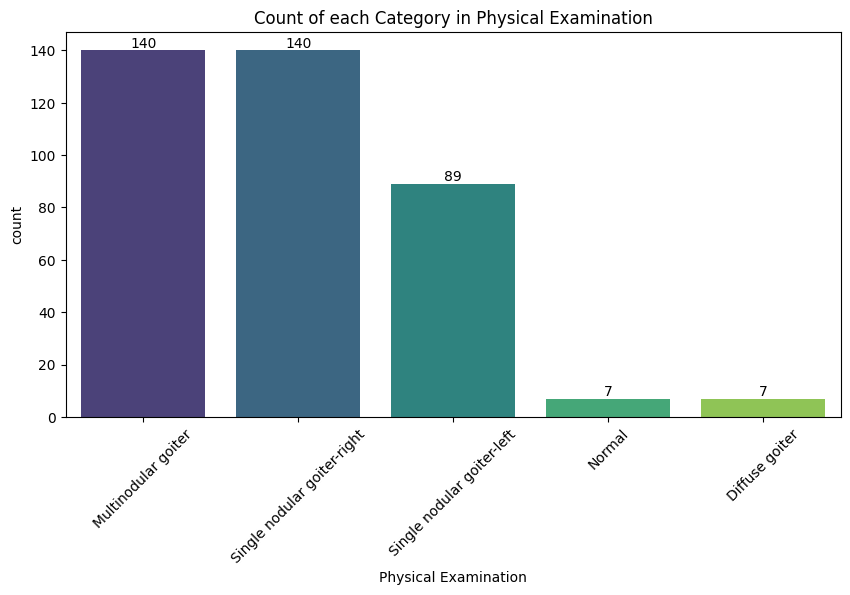

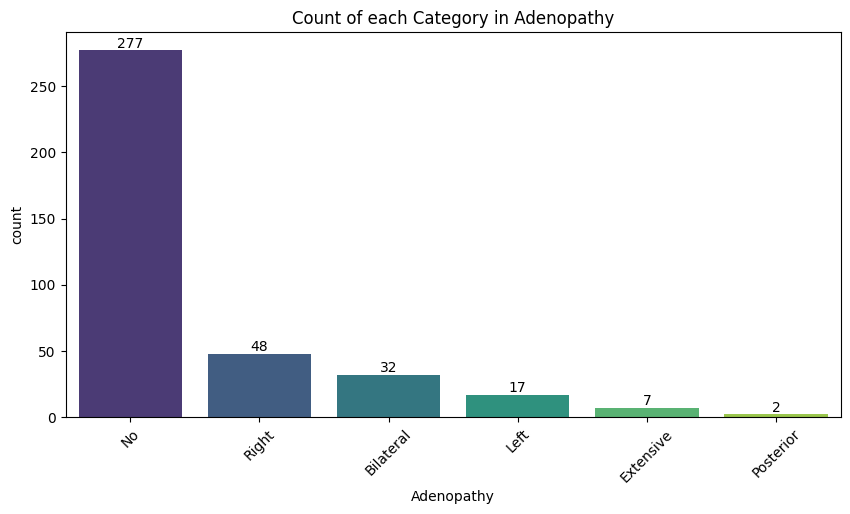

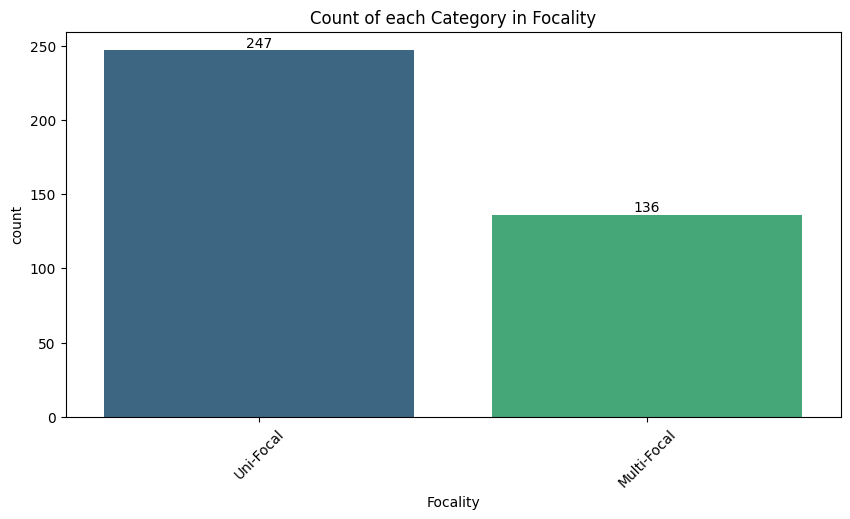

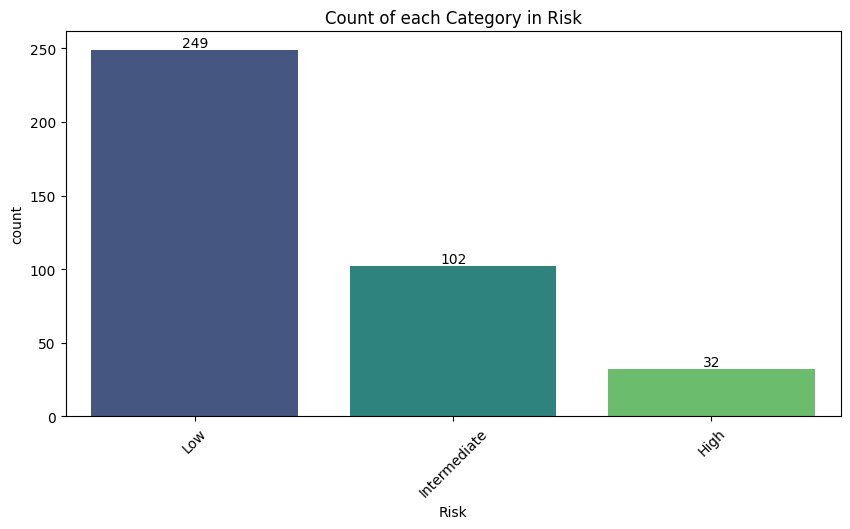

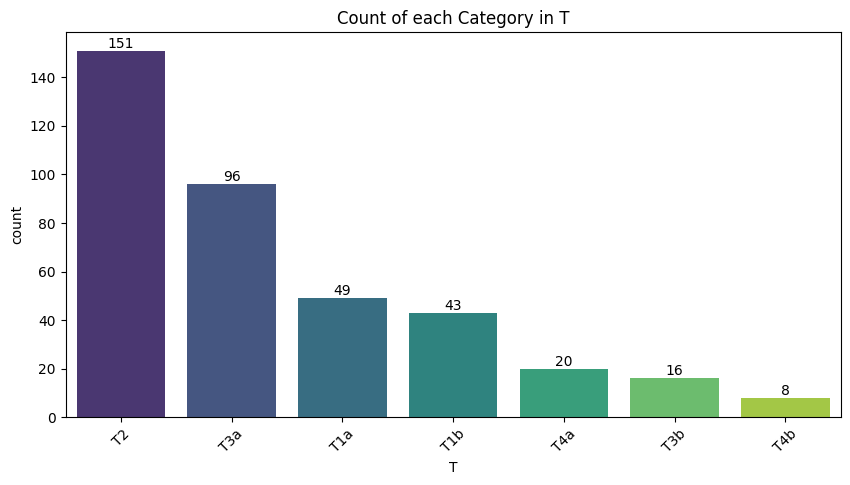

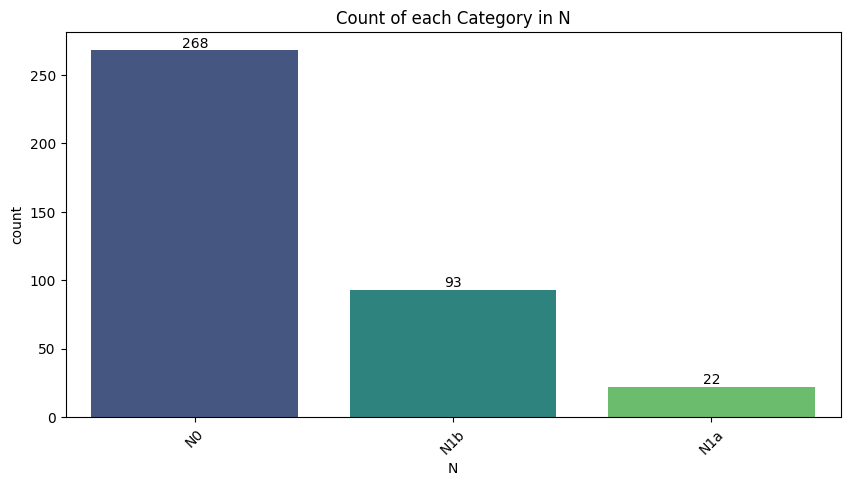

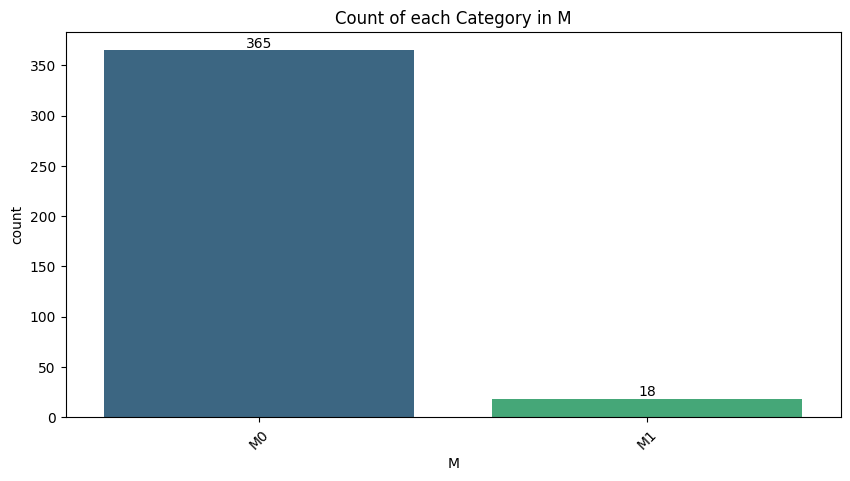

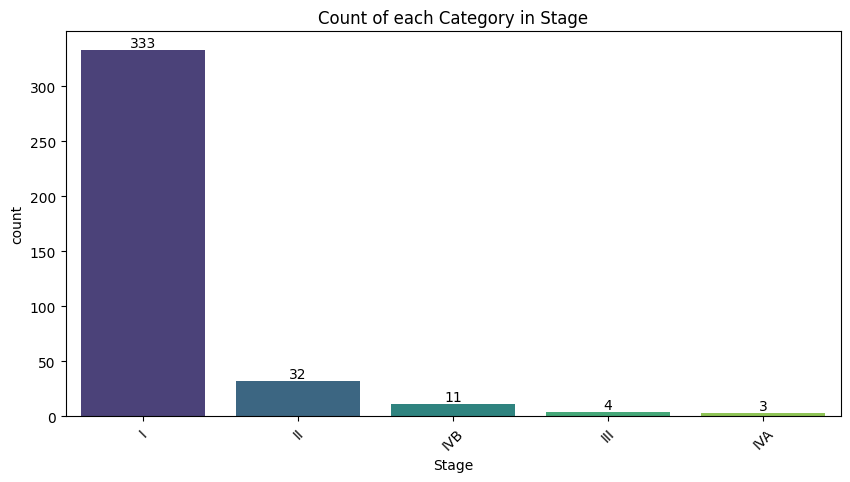

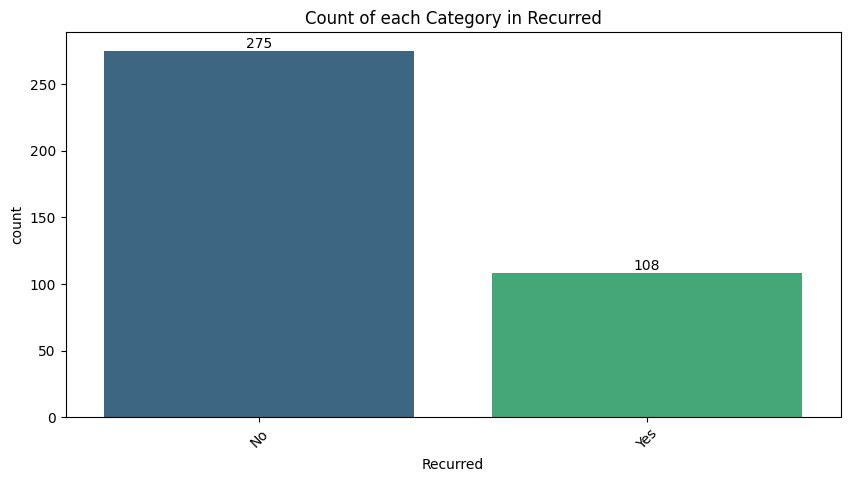

In [60]:
# Visualizing important categorical variables using barplots

categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 
                       'Physical Examination', 'Adenopathy', 'Focality', 'Risk','T', 'N', 'M', 'Stage', 'Recurred']

# Plotting count plots for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=tc, x=col, order=tc[col].value_counts().index, palette='viridis')
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.xticks(rotation=45)
    plt.title(f'Count of each Category in {col}')
    plt.show()


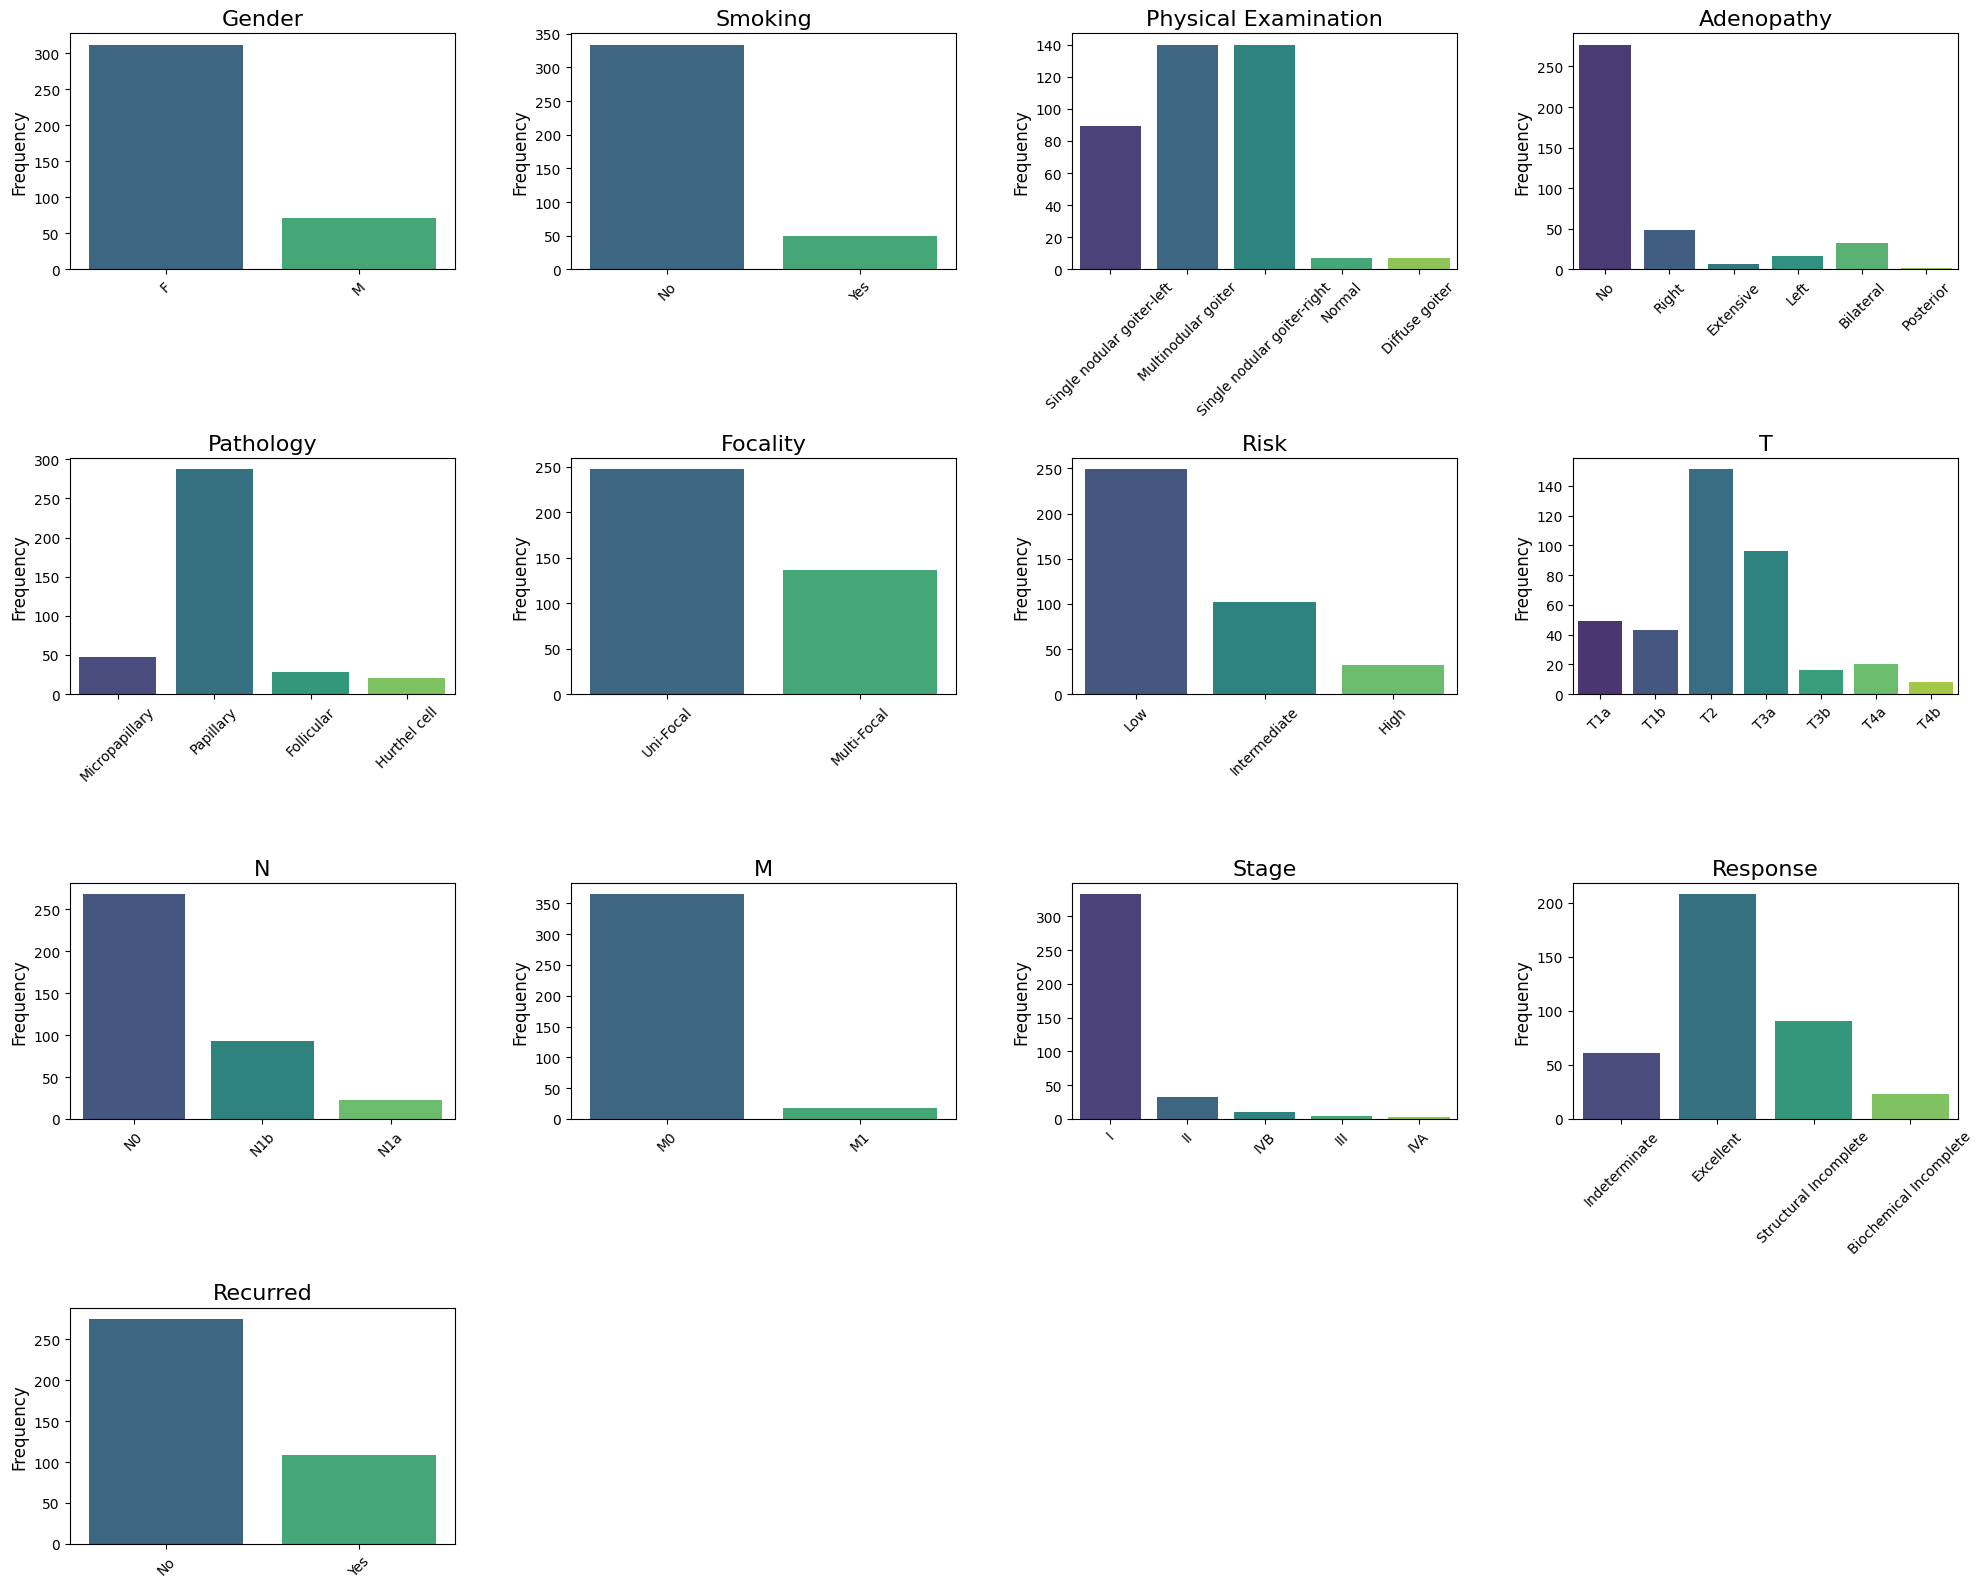

In [61]:
# List of variables to plot
categ_vars = ['Gender', 'Smoking', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Number of rows and columns for the plot grid
num_rows = 4  # Increase the rows to 4 to fit all 13 variables
num_cols = 4 # You can keep the columns at 4 for a cleaner look

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))  # Adjusted figsize for better space

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot for categorical variables
for i, var in enumerate(categ_vars):
    sns.countplot(x=var, data=tc, palette='viridis', ax=axes[i])
    axes[i].set_title(var, fontsize=16)  # Set the title at the top of the graph
    axes[i].set_ylabel('Frequency', fontsize=12)  # Keep y-axis label for frequency
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[i].set_xlabel('')  # Remove the x-axis label (bottom title)

# Hide any extra subplots (if we have fewer than 16 variables)
for i in range(len(categ_vars), len(axes)):
    axes[i].axis('off')  # Hide empty subplots
    
# Adjust layout to provide space between plots
plt.tight_layout()

# Additional space adjustments
plt.subplots_adjust(hspace=0.8, wspace=0.3)  # Adjust the vertical and horizontal spacing between subplots

# Display the plot
plt.show()

**Smmary of Explratory Data Analysis** 

In [62]:
# Encoding categorical data
labelencoder = LabelEncoder()

for col in tc.columns:
    if tc[col].dtype == 'object':
        tc[col] = labelencoder.fit_transform(tc[col])

In [63]:
tc.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,1.950392,2.561358,2.924282,2.550914,0.644909,1.566580,2.206266,0.543081,0.046997,0.242820,1.574413,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.630917,1.350110,1.172106,0.890257,0.479167,0.643233,1.344667,0.857732,0.211910,0.773274,0.917585,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,4.000000,3.000000,1.000000


In [64]:
tc.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


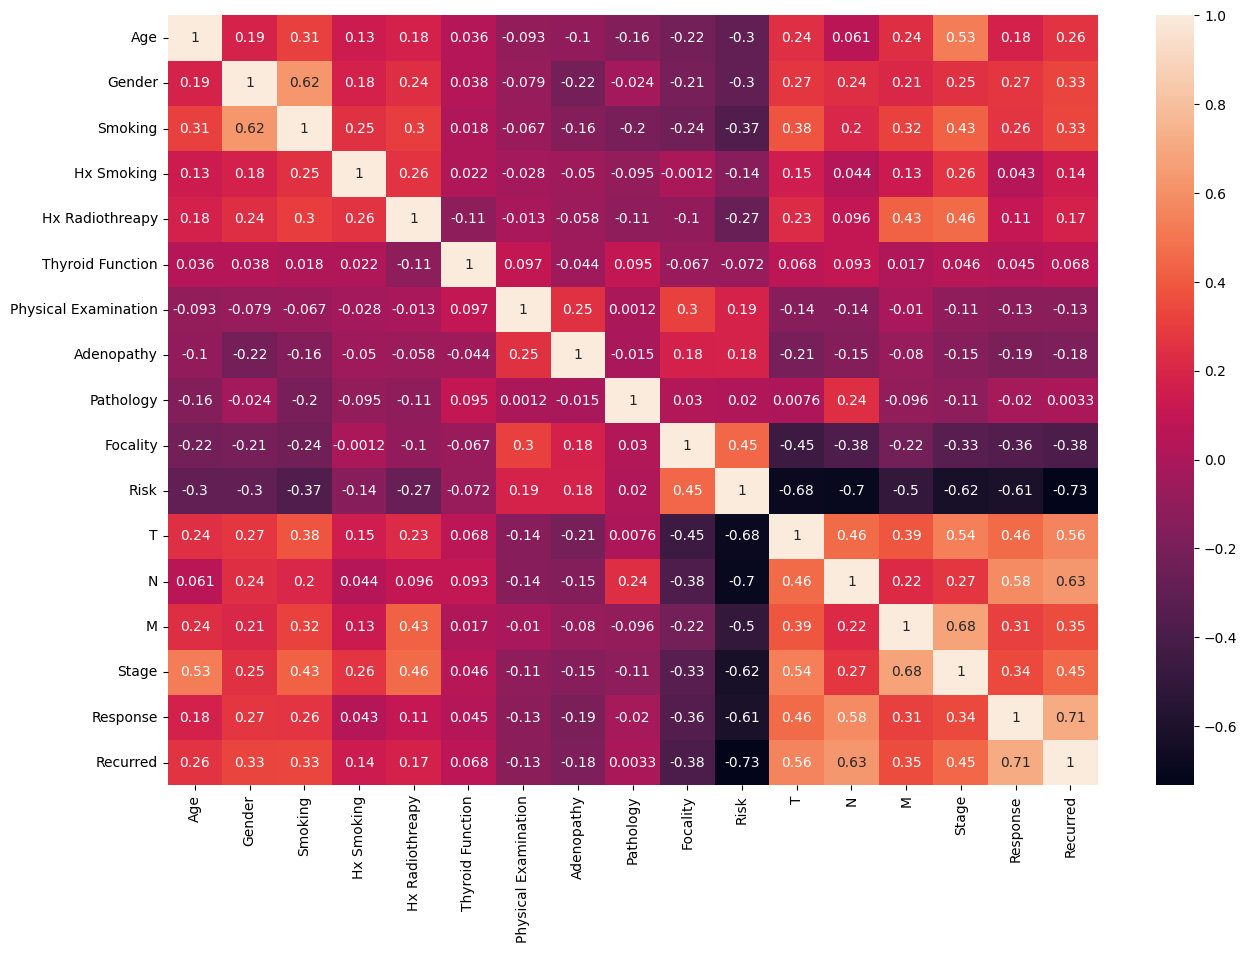

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(tc.corr(),annot=True)
plt.show()

### Explratory Data Analysis
**Summary of EDA Insights**

***Dataset Overview:*** 
tc.info() shows there are 383 total entries, several catagorical features and a numerical column. No missing values in the dataset. 

  ***Summary Statistics:*** 
Age distribution , numerical variables and catagorical variables. 

  ***Visualization Insights:*** 
Countplot show thyroid cancer is more prevalent in females.There is weak correlation among numeric features. Boxplot show some minor outliers which have low impact on prediction. 

In [66]:
columns = ['T', 'N', 'M', 'Stage', 'Response', 'Recurred', 'Focality', 'Hx Radiothreapy']

for col in columns:
    print(f"Value counts for {col}:")
    print(tc[col].value_counts(), "\n")

Value counts for T:
T
2    151
3     96
0     49
1     43
5     20
4     16
6      8
Name: count, dtype: int64 

Value counts for N:
N
0    268
2     93
1     22
Name: count, dtype: int64 

Value counts for M:
M
0    365
1     18
Name: count, dtype: int64 

Value counts for Stage:
Stage
0    333
1     32
4     11
2      4
3      3
Name: count, dtype: int64 

Value counts for Response:
Response
1    208
3     91
2     61
0     23
Name: count, dtype: int64 

Value counts for Recurred:
Recurred
0    275
1    108
Name: count, dtype: int64 

Value counts for Focality:
Focality
1    247
0    136
Name: count, dtype: int64 

Value counts for Hx Radiothreapy:
Hx Radiothreapy
0    376
1      7
Name: count, dtype: int64 



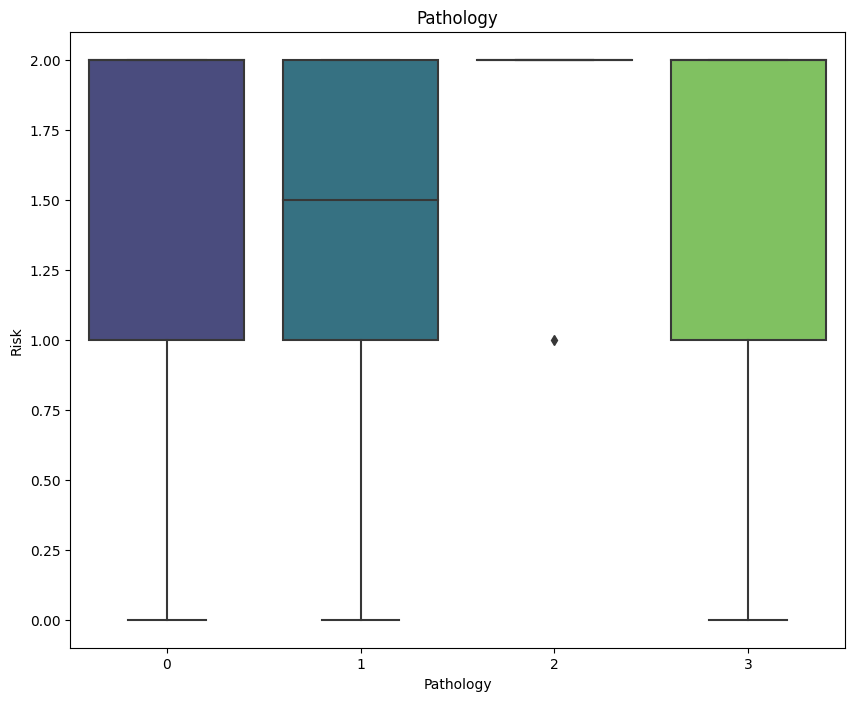

In [75]:
# Pathology distribution based on Risk
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pathology', y='Risk', palette='viridis', data=tc)
plt.title('Pathology')
plt.show()

## Summary of Insights from Each Boxplot:
**Age**: Most patients fall within the middle age group. Data is moderately spread. 

**T**: Tumer stage are catagorical as it shows distinct lavels like T1a, T1b etc. NO outliers.

**N**: Lymph nodes involvement is catagorical and most patients are in N0 stage i.e. no lymph node involvement. 

**M**: Almost all patients have M) i.e. no distant metastasis. few of them are in M1 and no outliers. 

**Stage**: Most patients are in first stage. Afew patients are in advanced stage iii, iv. This shows early diagnosis trend in the dataset. 

In [76]:
#Splitting train and test data
X = tc.drop('Recurred', axis=1)
y = tc['Recurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train the model and visualize the confusion matrix and decision tree
def train_and_visualize(max_depth=3):
    # Initialize and train the Decision Tree Classifier
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = tree.predict(X_test)
    
    
    # Plotting the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True, feature_names=X.columns.tolist(), class_names=list(np.unique(y).astype(str)))
    plt.title('Decision Tree Structure')
    plt.show()
    
interact(train_and_visualize, max_depth=IntSlider(min=1, max=10, step=1, value=4, description='Max Depth'))

interactive(children=(IntSlider(value=4, description='Max Depth', max=10, min=1), Output()), _dom_classes=('wi…

<function __main__.train_and_visualize(max_depth=3)>

Results from model:  Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77

Accuracy : 0.935
Precision: 0.935
Recall   : 0.935
F1 Score : 0.933


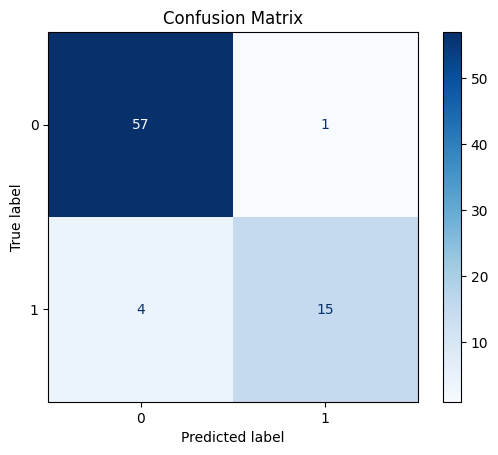



Results from model:  Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

Accuracy : 0.987
Precision: 0.987
Recall   : 0.987
F1 Score : 0.987


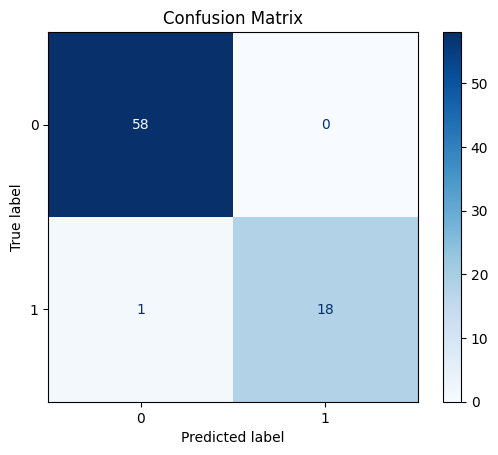



Results from model:  Support Vector Machines
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        58
           1       1.00      0.32      0.48        19

    accuracy                           0.83        77
   macro avg       0.91      0.66      0.69        77
weighted avg       0.86      0.83      0.80        77

Accuracy : 0.831
Precision: 0.862
Recall   : 0.831
F1 Score : 0.796


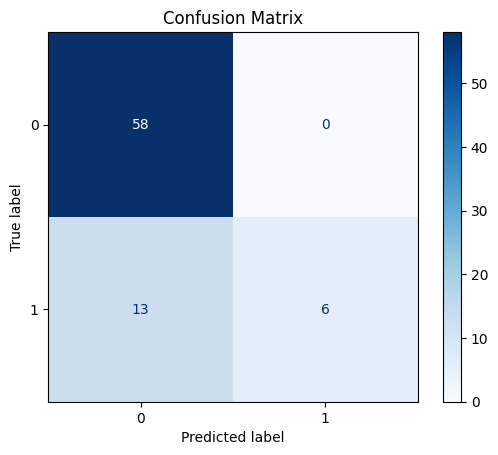



Results from model:  GRadient Boosting model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

Accuracy : 0.987
Precision: 0.987
Recall   : 0.987
F1 Score : 0.987


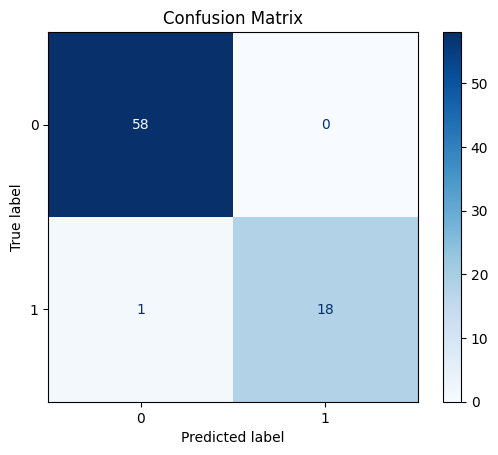



Results from model:  XGB
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77

Accuracy : 0.974
Precision: 0.974
Recall   : 0.974
F1 Score : 0.974


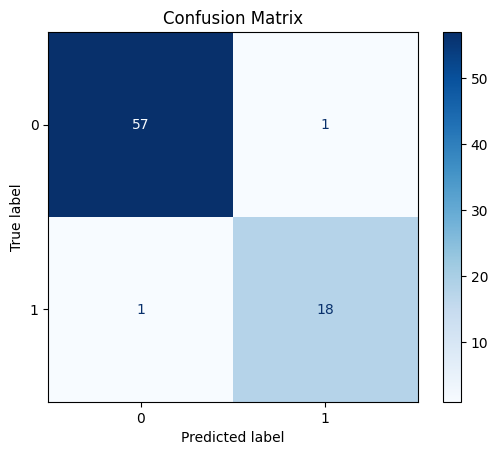



Results from model:  Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.86      0.95      0.90        19

    accuracy                           0.95        77
   macro avg       0.92      0.95      0.93        77
weighted avg       0.95      0.95      0.95        77

Accuracy : 0.948
Precision: 0.951
Recall   : 0.948
F1 Score : 0.949


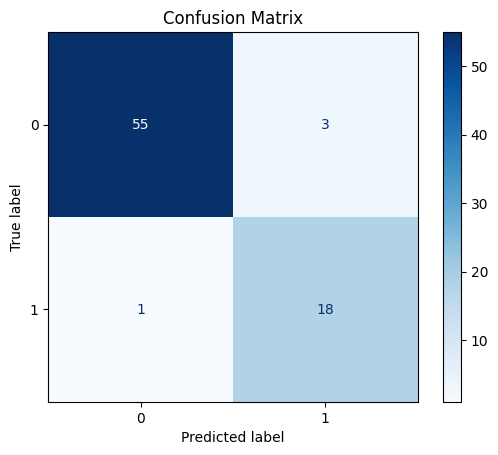



Results from model:  Neural Network
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77

Accuracy : 0.935
Precision: 0.935
Recall   : 0.935
F1 Score : 0.933


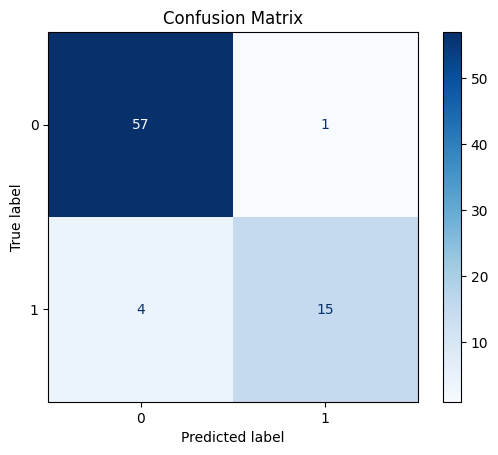

In [77]:
# Initialize models
log_reg = LogisticRegression(max_iter=10000)
random_forest = RandomForestClassifier(n_estimators=1000)
svm = SVC(max_iter=10000)
GBmodel = GradientBoostingClassifier(n_estimators=1000)
Xgb = XGBClassifier(n_estimators=1000, verbosity=0)
dt = DecisionTreeClassifier()
Nnet = MLPClassifier(max_iter=10000)
# List of models
models = [log_reg, random_forest, svm, GBmodel, Xgb, dt, Nnet]
model_names = ['Logistic Regression', 'Random Forest', 'Support Vector Machines', 'GRadient Boosting model','XGB', 'Decision Tree', 'Neural Network']

# Train and evaluate models
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    
    print("Results from model: ", name)
    
    # Printing the classification report including metrics such as precision, recall, and F1-score
    print(classification_report(y_test, y_pred, target_names=np.unique(y).astype(str)))
    
    # Calculating additional classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Printing calculated metrics
    print(f"Accuracy : {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall   : {recall:.3f}")
    print(f"F1 Score : {f1:.3f}")
    
    # Calculate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Display the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
    
    
    print("\n")


In [78]:
# Accuracy of all models
print("Accuracy of Logistic regression Classifier:   ",accuracy_score(y_test, log_reg.predict(X_test)) * 100," %")
print("Accuracy of Decision tree Classifier      :   ",accuracy_score(y_test, dt.predict(X_test)) * 100," %")
print("Accuracy of Random Forest Classifier      :   ",accuracy_score(y_test, random_forest.predict(X_test)) * 100," %")
print("Accuracy of SVM Classifier                :   ",accuracy_score(y_test, svm.predict(X_test)) * 100,"%")
print("Accuracy of Gradient Boost Classifier     :   ",accuracy_score(y_test, GBmodel.predict(X_test)) * 100," %")
print("Accuracy of XGB classifier Classifier     :   ",accuracy_score(y_test, Xgb.predict(X_test)) * 100,"%")
print("Accuracy of Neural network Classifier     :   ",accuracy_score(y_test, Nnet.predict(X_test)) * 100," %")

Accuracy of Logistic regression Classifier:    93.5064935064935  %
Accuracy of Decision tree Classifier      :    94.8051948051948  %
Accuracy of Random Forest Classifier      :    98.7012987012987  %
Accuracy of SVM Classifier                :    83.11688311688312 %
Accuracy of Gradient Boost Classifier     :    98.7012987012987  %
Accuracy of XGB classifier Classifier     :    97.40259740259741 %
Accuracy of Neural network Classifier     :    93.5064935064935  %


In [79]:
# List of models
models = [log_reg, random_forest, svm, GBmodel, Xgb, Nnet, dt ]
models.sort(key=lambda x: x.score(X_test, y_test), reverse=True)


for model in models:
    i = models.index(model)
    print(model)
    print(i + 1., "Test Accuracy {:.2f}%".format(models[i].score(X_test, y_test) * 100))

RandomForestClassifier(n_estimators=1000)
1.0 Test Accuracy 98.70%
GradientBoostingClassifier(n_estimators=1000)
2.0 Test Accuracy 98.70%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
3.0 Test Accuracy 97.40%
DecisionTreeClassifier()
4.0 Test Accuracy 94.81%
LogisticRegression(max_iter=1

### Conclusion:
in this project, I developed a predective model for throid cancer using historical patient data and applied various machine learning techniques to eevaluate its performance. Through careful preprocessing, feature selection, and model tuning, I was able to create a robust clessification model.

 **Feasibility**: It is feasible to accurately predict thyroid cancer using various models like Randeom Forest, Gradient Boosting, Neural Network etc. 
 
 **Random Forest and Gradient Boosting classifers** performed well, with better accuracy and generalization. 
 
 **Important predictive features**: Pathology, History of thyroid disease, Tumor types, and radiotherapy exposure history are the most indicative of thyroid cancer. 